---
## Sorbonne Université
# <center> Mathématiques discrètes </center>
## <center> LU2IN005 </center>
## <div style="text-align:right;"> Année 2023-2024 </div>
---

---
# <center> TME programmation d'automates finis </center>
L'objectif de ce TME est de programmer en python quelques uns des
algorithmes pour les automates finis vus en cours et en TD, en
utilisant des structures de données fournies dans le code mis à votre
disposition.
---
# Consignes
Copiez dans votre répertoire de travail les fichiers présents dans le Dossier 
*Fichiers Python fournis* de la page Moodle de l'UE.

Ils contiennent les définitions de structures de données décrites
ci-dessous, ainsi que des aide-mémoire sur l'utilisation de python.

**Le seul fichier que vous êtes autorisés à modifier** est celui-ci, c'est-à-dire
`automate_etudiant.ipynb`, partiellement prérempli. 
Les instructions `return` sont à supprimer lorsque
vous remplirez le contenu des différentes fonctions.  Les autres
fichiers n'ont pas besoin d'être lus (mais ils peuvent l'être).
Si votre programme nécessite de lire des fichiers, **ceux-ci doivent être enregistrés dans le répertoire ExemplesAutomates** que vous avez téléchargé.
---

_Binôme_
----------

**NOM**:  LECOMTE            

**Prénom**:  Antoine           

**Numéro d'étudiant**:  21103457    

**NOM**: ZHANG

**Prénom**:  Yuxiang 

**Numéro d'étudiant**:  21202829 



### Table des matières

> [1. Présentation](#sec1)
>> [1.1 La classe `State`](#sec1_1) <br>
>> [1.2 La classe `Transition`](#sec1_2) <br>
>> [1.3 La classe `Automate`](#sec1_3)

> [2. Prise en mains](#sec2)
>> [2.1 Création d'automates](#sec2_1) <br>
>> [2.2 Premières manipulations](#sec2_2) <br>

> [3. Exercices de base : tests et complétion](#sec3)

> [4. Déterminisation](#sec4)

> [5. Constructions sur les automates réalisant des opérations sur les langages acceptés](#sec5)
>> [5.1 Opérations ensemblistes sur les langages](#sec5_1) <br>
>> [5.2 Opérations rationnelles sur les langages](#sec5_2)

In [907]:
## Import des bibliothèques nécessaires au projet.
## Ne pas modifier les fichiers "bibliothèque".

## Interpréter cette cellule avant de continuer.

from transition import *
from state import *
import os
import copy
from automateBase import AutomateBase

class Automate(AutomateBase):
    pass

### 1. Présentation  <a class="anchor" id="sec1"></a>

Le projet utilise le langage python avec une syntaxe légèrement
différente de celle vue en **LU1IN001 / 011**, parce qu'il exploite en particulier
la notion de classes d'objets. Une introduction à cette notion est présentée dans le livre associé
au cours : cf [Chapitre 13](https://www-licence.ufr-info-p6.jussieu.fr/lmd/licence/2021/ue/LU1IN001-2021oct/cours2020.pdf).

De plus, le typage des variables est noté de façon légèrement différente, en commentaires, pour les déclarations
comme pour les arguments des fonctions. Pour ces derniers, les types sont indiqués dans la première ligne de la documentation de la fonction.

Les particularités sont brièvement expliquées en annexe
de ce document. Par ailleurs, vous trouverez dans la section
`projet` de la page Moodle un mémo sur la syntaxe python, ainsi que la carte de
référence du langage utilisée en **LU1IN001 / 011**.  On rappelle qu'une ligne
commençant par `#` est un commentaire, ignoré par
l'interpréteur.

Toutes les structures de données nécessaires à la construction des
automates sont fournies sous la forme de classes python, pour les
transitions d'un automate, ses états, et les automates
eux-mêmes. Cette section indique comment les utiliser.

#### 1.1 La classe `State` <a class="anchor" id="sec1_1"></a>

Un état est représenté par
- un entier `id` (type `int`) qui définit son identifiant,
- un booléen `init` (type `bool`) indiquant si c'est un état initial,
- un booléen `fin` (type `bool`) indiquant si c'est un état final,
- une chaîne de caractères `label` (type `str`) qui définit son étiquette, permettant de le *décorer*. Par défaut, cette variable est la version chaîne de caractères de l'identifiant de l'état. 

On définit l'alias de type `State` pour représenter les variables de ce type. 

Ainsi, l'instruction ci-dessous crée une variable `s` représentant un état d'identifiant `1`, qui est un état initial mais pas final, dont l'identifiant et l'étiquette  `1` :

In [908]:
# s : State
s = State(1, True, False)

Si l'on souhaite avoir une étiquette différente de l'identifiant, on
utilise un quatrième argument :

In [909]:
s = State(1, True, False, 'etat 1') 

On accède ensuite aux différents champs de `s` par la notation pointée : exécutez les cellules suivantes pour observer l'affichage obtenu.

In [910]:
print('La valeur de s.id est : ')
print(s.id)

La valeur de s.id est : 
1


In [911]:
print('La valeur de s.init est : ')
print(s.init)

La valeur de s.init est : 
True


In [912]:
print('La valeur de s.fin est : ')
print(s.fin)

La valeur de s.fin est : 
False


In [913]:
print('La valeur de s.label est : ')
print(s.label)

La valeur de s.label est : 
etat 1


In [914]:
print("L'affichage de s est : ")
print(s)

L'affichage de s est : 
etat 1(init)


Ainsi, une variable de type `State` est affichée par son étiquette et, entre parenthèses, si c'est un état initial et/ou final.

#### 1.2 La classe `Transition` <a class="anchor" id="sec1_2"></a>

Une transition est représentée par 
- un état `stateSrc` (type `State`) correspondant à son état de départ
- un caractère `etiquette` (type `str`) donnant son   étiquette
- un état `stateDest` (type `State`) correspondant à son état de destination

On définit l'alias de type `Transition` pour représenter les variables de ce type.

La séquence d'instructions suivante crée la transition d'étiquette `"a"` de l'état `s` (défini ci-dessus) vers lui-même et affiche les différents champs de la transition :

In [915]:
# t : Transition
t = Transition(s, "a", s)

In [916]:
print('La valeur de t.etiquette est : ')
print(t.etiquette)

La valeur de t.etiquette est : 
a


In [917]:
print("L'affichage de t.stateSrc est : ")
print(t.stateSrc)

L'affichage de t.stateSrc est : 
etat 1(init)


On remarque que la variable `stateSrc` est de type `State`, on obtient donc un état, et non uniquement un
identifiant d'état. 

In [918]:
print("L'affichage de t.stateDest est : ")
print(t.stateDest)

L'affichage de t.stateDest est : 
etat 1(init)


In [919]:
print("L'affichage de t est : ")
print(t)

L'affichage de t est : 
[etat 1(init)-a->etat 1(init)]


#### 1.3 La classe `Automate` <a class="anchor" id="sec1_3"></a>

Un automate est représenté par
- l'ensemble de ses transitions `allTransitions` (de type `set[Transition]`) 
- l'ensemble de ses états `allStates` (de type `set[State]`)
- une étiquette `label` (de type `str`) qui est éventuellement vide.

On définit l'alias de type `Automate` pour représenter les variables de ce type.

Ainsi, de même que pour les classes précédentes, l'accès aux
différents champs se fait par la notation pointée. Par exemple, on
obtient l'ensemble des états d'un automate `monAutomate` par
l'instruction `monAutomate.allStates`.

Pour créer un automate, il existe trois possibilités.

**Création à partir d'un ensemble de transitions.**<br>
On peut d'abord utiliser le constructeur de signature `Automate : set[Transition] -> Automate`.<br>
Il déduit alors l'ensemble des états à partir de l'ensemble des transitions et définit par défaut l'étiquette
de l'automate comme la chaîne de caractères vide.

Par exemple, en commençant par créer les états et les transitions nécessaires :

In [920]:
## création d'états
# s1 : State
s1 = State(1, True, False)
# s2 : State
s2 = State(2, False, True)

## création de transitions
# t1 : Transition
t1 = Transition(s1,"a",s1)
# t2 : Transition
t2 = Transition(s1,"a",s2)
# t3 : Transition
t3 = Transition(s1,"b",s2)
# t4 : Transition
t4 = Transition(s2,"a",s2)
# t5 : Transition
t5 = Transition(s2,"b",s2)
# set_transitions : set[Transition]
set_transitions = {t1, t2, t3, t4, t5}

## création de l'automate
# aut : Automate
aut = Automate(set_transitions)

L'affichage de cet automate, par la commande `print(aut)` produit alors le résultat suivant : 

In [921]:
print(aut)

Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-b->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->2(fin)]
  [1(init)-a->1(init)]
  [2(fin)-a->2(fin)]



Les états de l'automate sont déduits de l'ensemble de transitions.

Optionnellement, on peut donner un nom à l'automate, en utilisant la variable `label`, par exemple :

In [922]:
# aut2 : Automate
aut2 = Automate(set_transitions, label="A") 

print(aut2)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-b->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->2(fin)]
  [1(init)-a->1(init)]
  [2(fin)-a->2(fin)]



**Création à partir d'un ensemble de transitions et d'un ensemble d'états.**<br>
Dans le second cas, on crée un automate à partir d'un ensemble de
transitions mais aussi d'un ensemble d'états, par exemple pour représenter des
automates contenant des états isolés. Pour cela, on utilise le
constructeur `Automate : set[Transition] x set[State] -> Automate`.

On peut également, optionnellement, donner un nom à l'automate :

In [923]:
# set_etats : set[State]
set_etats = {s1, s2}

# aut3 : Automate
aut3 = Automate(set_transitions, set_etats, "B")

print(aut3)

Automate B
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-b->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->2(fin)]
  [1(init)-a->1(init)]
  [2(fin)-a->2(fin)]



L'ordre des paramètres peut ne pas être respecté **à la condition** que l'on donne leur nom explicitement. Ainsi, la ligne suivante est correcte :

In [924]:
aut = Automate(setStates = set_etats, label = "A", setTransitions = set_transitions)

print(aut)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-b->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->2(fin)]
  [1(init)-a->1(init)]
  [2(fin)-a->2(fin)]



**Création à partir d'un fichier contenant sa description.**<br>
La fonction `Automate.creationAutomate : str -> Automate` prend en argument un nom de fichier qui décrit un automate et construit l'automate correspondant (voir exemple ci-dessous).

La description textuelle de l'automate doit suivre le format suivant (voir exemple ci-dessous) :
- #E: suivi de la liste des noms des états, séparés par
  des espaces ou des passages à la ligne. Les noms d'états peuvent
  être n'importe quelle chaîne alphanumérique pouvant également
  contenir le symbole `_`. Par contre, si le nom d'état
  contient des symboles *non numériques* il ne doit pas commencer
  par un chiffre, sous peine de provoquer une erreur à l'affichage.
  Ainsi, `10` et `A1` sont des noms d'états possibles,
  mais `1A` ne l'est pas.
- #I: suivi de la liste des états initiaux
  séparés par des espaces ou des passages à la ligne, 
- #F: suivi de la liste des
  états finaux séparés par des espaces ou des passages à la ligne, 
- #T: suivi de la liste des transitions séparées par des
  espaces ou des passages à la ligne. Chaque transition est donnée
  sous le format `(etat1, lettre, etat2)`.

Par exemple le fichier `exempleAutomate.txt` contenant <br>
`#E: 0 1 2 3`<br>
`#I: 0`<br>
`#F: 3`<br>
`#T: (0 a 0)`<br>
`	(0 b 0)`<br>
`	(0 a 1)`<br>
`	(1 a 2)`<br>
`	(2 a 3)`<br>
`	(3 a 3)`<br>
`	(3 b 3)`<br>
est formaté correctement. L'appel suivant produira l'affichage...

In [925]:
# automate : Automate
automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
print(automate)

Etats :
  0(init)
  1
  2
  3(fin)
Transitions :
  [3(fin)-a->3(fin)]
  [2-a->3(fin)]
  [0(init)-b->0(init)]
  [0(init)-a->0(init)]
  [3(fin)-b->3(fin)]
  [0(init)-a->1]
  [1-a->2]



**Fonctions de manipulation des automates.**<br>
La classe automate contient également de nombreuses fonctions utiles. Elles
s'appliquent à un objet de type `Automate` et s'utilisent donc sous la forme
`aut.<`*fonction*`>(<`*parametres*`>)` où `aut` est une variable de type `Automate`.


- `show : float -> NoneType` <br> 
    prend en argument facultatif un flottant (facteur de grossissement, par défaut il vaut 1.0) et produit une représentation graphique de l'automate.<br>
    Ainsi, en utilisant l'automate défini dans le fichier d'exemple précédent, l'instruction `automate.show(1.2)` produit l'image suivante :

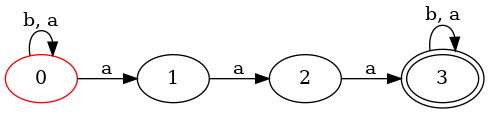

In [926]:
automate.show(1.2)

- `addTransition : Transition -> bool`<br>
  prend en argument une transition `t`, fait la mise à jour de
  l'automate en lui ajoutant `t` et ajoute les états impliqués
  dans l'automate s'ils en sont absents. Elle rend `True` si l'ajout a
  eu lieu, `False` sinon (si `t` était déjà présente dans l'automate).
  
- `removeTransition : Transition -> bool`<br>
  prend en argument une transition `t` et fait la mise à jour de
  l'automate en lui enlevant la transition, sans modifier les
  états. Elle rend `True` si la suppression a eu lieu, `False` sinon (si
  `t` était absente de l'automate).

- `addState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en lui ajoutant `s`.  Elle rend `True` si l'ajout a eu
  lieu, `False` sinon (si `s` était déjà présent dans l'automate).

- `nextId : -> int`<br>
  renvoie un entier id frais, en choisissant l'entier le plus petit,
  strictement supérieur à tous les id des états de l'automate.

- `removeState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en supprimant `s` ainsi que toutes ses transitions
  entrantes et sortantes.  Elle rend `True` si l'ajout a eu lieu, `False`
  sinon (si `s` était absent de l'automate).
  
- `getSetInitialStates :  -> set[State]`<br> 
  rend l'ensemble des états initiaux.

- `getSetFinalStates :  -> set[State]`<br>
  rend l'ensemble des états finaux.

- `getSetTransitionsFrom : State -> set[Transition]`<br>
  rend l'ensemble des transitions sortant de l'état passé en argument.

- `prefixStates : int -> NoneType`<br>
  modifie les identifiants et les étiquettes de tous les états de
  l'automate en les préfixant par l'entier passé en argument.

- `succElem : State x str -> set[State]`<br>
  étant donné un état `s` et un caractère `a`, elle rend l'ensemble des
  états successeurs de `s` par le caractère `a`.  Formellement,
  
  $$succElem(s, a) = \{s' \in S \mid  s \xrightarrow{a} s'\}.$$
  
  Cet ensemble peut contenir plusieurs états si l'automate n'est pas déterministe.

In [927]:
# Voilà le code de succElem

def succElem(self, state, lettre):
    """ State x str -> set[State]
        rend l'ensemble des états accessibles à partir d'un état state par l'étiquette lettre
    """
    successeurs = set()
    # t: Transitions
    for t in self.getSetTransitionsFrom(state):
        if t.etiquette == lettre:
            successeurs.add(t.stateDest)
    return successeurs

Automate.succElem = succElem

Avec l'exemple précédent, on obtient :

In [928]:
s0 = list(automate.getSetInitialStates())[0] ## on récupère l'état initial de automate
automate.succElem(s0, 'a')

{0(init), 1}

### 2. Prise en mains  <a class="anchor" id="sec2"></a>

#### 2.1 Création d'automates <a class="anchor" id="sec2_1"></a>

Soit l'automate $\mathcal{A}$ défini sur l'alphabet $\{ a,b \}$, d'états $0,1,2$, 
d'état initial 0, d'état final 2 et de transitions : <br>$(0,a,0)$, $(0,b,1)$, 
$(1,a,2)$, $(1,b,2)$, $(2,a,0)$ et $(2,b,1)$.

1. Créer l'automate $\mathcal{A}$ à l'aide de son ensemble de transitions. Pour cela, créer un état `s0`  
d'identifiant $0$
  qui soit initial, un état `s1` d'identifiant $1$ et un état
  `s2` d'identifiant $2$ qui soit final. Puis créer `t1`, `t2`, `t3`, `t4`, `t5` et
  `t6` les 6 transitions de l'automate. Créer enfin l'automate
  `auto` à partir de ses transitions, par exemple avec l'appel<br>
  `auto = Automate({t1,t2,t3,t4,t5,t6})`.<br>
  Vérifier que l'automate correspond bien à $\mathcal{A}$ en l'affichant.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-b->1]
  [1-b->2(fin)]
  [2(fin)-a->0(init)]
  [2(fin)-b->1]
  [1-a->2(fin)]
  [0(init)-a->0(init)]



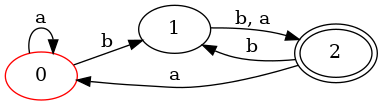

In [929]:
# A faire 

s0 = State(0, True, False)
s1 = State(1, False, False)
s2 = State(2, False, True)

t1 = Transition(s0, "a", s0)
t2 = Transition(s0, "b", s1)
t3 = Transition(s1, "a", s2)
t4 = Transition(s1, "b", s2)
t5 = Transition(s2, "a", s0)
t6 = Transition(s2, "b", s1)

auto = Automate({t1, t2, t3, t4, t5, t6})
print(auto)
auto.show()

2. Créer l'automate $\mathcal{A}$ à l'aide de sa liste de
  transitions et d'états, par exemple à l'aide de l'appel<br>
  `auto1 = Automate({t1,t2,t3,t4,t5,t6}, {s0,s1,s2})`<br>
  puis afficher l'automate obtenu à l'aide de `print` puis à l'aide de `show`.
  Vérifier que l'automate `auto1` est bien
  identique à l'automate `auto`.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-b->1]
  [1-b->2(fin)]
  [2(fin)-a->0(init)]
  [2(fin)-b->1]
  [1-a->2(fin)]
  [0(init)-a->0(init)]



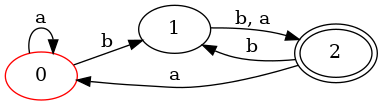

In [930]:
# A faire

auto1 = Automate({t1, t2, t3, t4, t5, t6}, {s0, s1, s2})
print(auto1)
auto1.show()

3. Créer l'automate $\mathcal{A}$ à partir d'un fichier. Pour cela,
  créer un fichier `auto2.txt`, dans lequel sont indiqués les
  listes des états et des transitions, ainsi que l'état initial et
  l'état final, en respectant la syntaxe donnée dans la section
  précédente. Par exemple la liste d'états est décrite par la ligne
  `#E: 0 1 2`.  Utiliser ensuite par exemple l'appel
  `auto2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")`, puis afficher
  l'automate `auto2` à l'aide de `print` ainsi qu'à l'aide de `show`.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-b->1]
  [2(fin)-a->0(init)]
  [1-b->2(fin)]
  [2(fin)-b->1]
  [1-a->2(fin)]
  [0(init)-a->0(init)]



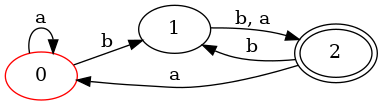

In [931]:
# A faire
auto2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")
print(auto2)
auto2.show()

#### 2.2 Premières manipulations <a class="anchor" id="sec2_2"></a>

1. Appeler la fonction `removeTransition` sur l'automate
  `auto` en lui donnant en argument la transition $(0,a,1)$. Il
  s'agit donc de créer une variable `t` de type
  `Transition` représentant $(0,a,1)$ et d'effectuer l'appel
  `auto.removeTransition(t)`. Observer le résultat sur un
  affichage.  Appeler ensuite cette fonction sur `auto` en lui
  donnant en argument la transition `t1`. Observer le résultat
  sur un affichage. Appeler la fonction `addTransition` sur
  l'automate `auto` en lui donnant en argument la transition
  `t1`. Vérifier que l'automate obtenu est bien le même
  qu'initialement.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-b->1]
  [1-b->2(fin)]
  [2(fin)-a->0(init)]
  [2(fin)-b->1]
  [1-a->2(fin)]
  [0(init)-a->0(init)]



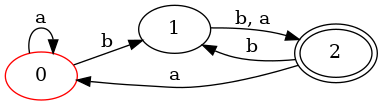

In [932]:
# A faire
t = Transition(s0, "a", s1)
auto.removeTransition(t) # il a supprime rien parce qu'il a pas la Transition (s0, "a", s1) dans l'automate auto
print(auto)
auto.show()

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-b->1]
  [1-b->2(fin)]
  [2(fin)-a->0(init)]
  [2(fin)-b->1]
  [1-a->2(fin)]
  [0(init)-a->0(init)]



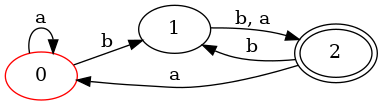

In [933]:
# A faire 
auto.addTransition(t1) # t1 = Transition(s0, "a", s0)
print(auto)
auto.show()

2. Appeler la fonction `removeState` sur l'automate
  `auto` en lui donnant en argument l'état
  `s1`. Observer le résultat. Appeler la fonction
  `addState` sur l'automate `auto` en lui donnant en
  argument l'état `s1`. Créer un état `s0bis` d'identifiant
  $0$ et initial. Appeler la fonction `addState` sur
  `auto` avec `s0bis` comme argument. Observer le résultat.

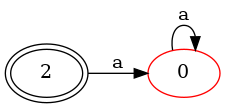

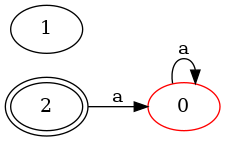

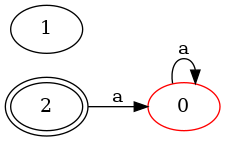

In [934]:
# A faire 
auto.removeState(s1) # supprime l'etat s1
auto.show()
auto.addState(s1) # ajouter l'etat s1 mais sans les transitions
auto.show()
s0bis = State(0,True,False) # il execute mais il s'affiche le meme automate que lors du show() precedent
auto.addState(s0bis)
auto.show()

3. Appeler la fonction `getSetTransitionsFrom` sur
  l'automate `auto1` avec `s1` comme argument. Afficher
  le résultat.

In [935]:
# A faire
print(auto1.getSetTransitionsFrom(s1))

{[1-b->2(fin)], [1-a->2(fin)]}


### 3. Exercices de base : tests et complétion  <a class="anchor" id="sec3"></a>

1. Donner une définition de la fonction `succ`
  qui, étant donné un ensemble d'états $S$ et une chaîne de caractères
      $a$ (de longueur 1), renvoie l'ensemble des états successeurs de tous les états de $L$ par le caractère $a$. Cette fonction doit généraliser la fonction `succElem` pour qu'elle prenne en paramètre un ensemble d'états au lieu d'un seul état.  Formellement, si $S$ est un ensemble d'états et $a$ une lettre,
  $$succ(S,a) = \bigcup_{s \in S}succ(s,a) = \{s' \in S \mid \mbox{il
    existe } s \in L \mbox{ tel que } s \xrightarrow{a} s'\}.$$

In [936]:
# A faire 

def succ(self, setStates, lettre):
    """ Automate x set[State] x str -> set[State]
        rend l'ensemble des états accessibles à partir de l'ensemble d'états setStates par l'étiquette lettre
    """
    etat_access = set()  # Crée un ensemble vide pour stocker les états accessibles

    # Parcourt chaque état dans l'ensemble setStates
    for state in setStates:
        # Utilise une expression ensembliste pour obtenir tous les états de destination
        # dont l'étiquette est égale à lettre et l'état source est égal à l'état actuel dans la boucle
        # (t.stateDest pour t dans self.allTransitions est une compréhension d'ensemble)
        etat_access = etat_access | {t.stateDest for t in self.allTransitions if (t.etiquette == lettre) & (t.stateSrc == state)}

    # Retourne l'ensemble des états accessibles
    return etat_access

# Ajoute la méthode succ à la classe Automate
Automate.succ = succ

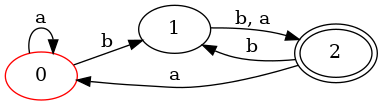

---


In [937]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.succ({s0, s2}, 'b') == {s1}
assert auto1.succ({s0}, 'a') == {s0}
assert auto1.succ({s0, s1}, 'a') == {s0, s2}

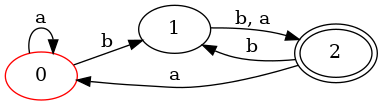

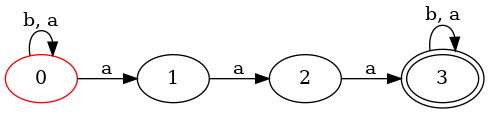

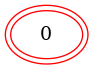

In [938]:
# Fournir un autre jeu de tests
### Test succ
auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")
s0 = State(0, True, False)
s1 = State(1, False, False)
s2 = State(2, False, True)

auto_t1.show()

assert auto_t1.succ({s0, s2}, 'b') == {s1} 
assert auto_t1.succ({s0}, 'a') == {s0}
assert auto_t1.succ({s0, s1}, 'a') == {s0, s2}

auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt") 
auto_t2 = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
s0 = State(0, True, False)
s1 = State(1, False, False)
s2 = State(2, False, False)
s3 = State(3, False, True)

auto_t2.show()

# Test sur une lettre ne faisant pas parti de l'alphabet :
assert auto_t1.succ({s0, s1}, 'c') == set()

# Test sur l'automate sans transition d'unique état 0 :
seul = State(0,True,True)
solitaire = Automate(set(),{seul})
solitaire.show()
assert solitaire.succ({seul}, 'c') == set()

# Test sur cas vide :
assert auto_t1.succ(set(),'a') == set()
auto_vide = Automate(set())
auto_vide.show()
assert auto_vide.succ({s0},'a') == set()

2. Donner une définition de la fonction `accepte`
  qui, étant donné une chaîne de caractères `mot`,
  renvoie un booléen qui vaut vrai si et seulement si `mot` est accepté par l'automate. Attention, noter que l'automate peut ne pas être déterministe.

In [939]:
# A faire 

def accepte(self, mot):
    """ Automate x str -> bool
    rend True si auto accepte mot, False sinon
    """
    # Obtenir l'état initial ou les états initiaux de l'automate
    state = self.getSetInitialStates()

    # Parcourir chaque lettre du mot et mettre à jour l'état actuel
    for etiquette in mot:
        state = self.succ(state, etiquette)

    # Vérifier si l'état actuel fait partie des états finaux
    for s0 in self.getSetFinalStates():
        for s1 in state:
            if s0 == s1:
                return True

    # Si aucun état final n'a été atteint, le mot n'est pas accepté
    return False

# Ajouter la méthode accepte à la classe Automate
Automate.accepte = accepte

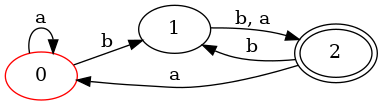

---


In [940]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.accepte('aa') == False
assert auto1.accepte('ab') == False
assert auto1.accepte('aba') == True

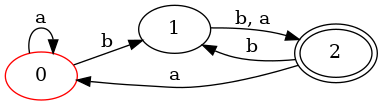

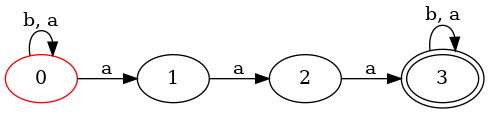

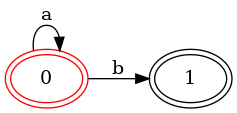

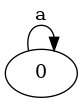

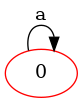

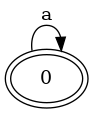

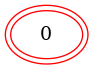

In [941]:
# Fournir un autre jeu de tests
### Test accepte
auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt") #Correspond à l'automate "auto"
auto_t1.show()

assert auto_t1.accepte('') == False
assert auto_t1.accepte('a') == False
assert auto_t1.accepte('aa') == False
assert auto_t1.accepte('ab') == False
assert auto_t1.accepte('aba') == True
assert auto_t1.accepte('aab') == False
assert auto_t1.accepte('abba') == False
assert auto_t1.accepte('abaaa') == False
assert auto_t1.accepte('ababaaba') == True
assert auto_t1.accepte('b') == False
assert auto_t1.accepte('bb') == True
assert auto_t1.accepte('abbbbbbbb') == True
assert auto_t1.accepte('abbbbbbb') == False
assert auto_t1.accepte('c') == False

# Tests sur un automate non déterministe
auto_t2 = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
auto_t2.show()

assert auto_t2.accepte('baab') == False
assert auto_t2.accepte('baaab') == True
assert auto_t2.accepte('baaaaaaaa') == True
assert auto_t2.accepte('bbbbbbbb') == False

#test sur un automate à 2 états finaux
s0 = State(0, True, True)
s1 = State(1, False, True)
deux_f = Automate({Transition(s0,'a',s0),Transition(s0,'b',s1)},{s0,s1})
deux_f.show()
assert deux_f.accepte('a') == True

# Test sur un automate sans états final ni initial
s3 = State(0,False,False)
auto_if = Automate({Transition(s3,'a',s3)},{s3})
auto_if.show()
assert auto_if.accepte('a') == False
assert auto_if.accepte('') == False

#test sur un automate sans état final
s4 = State(0,True,False)
auto_f = Automate({Transition(s4,'a',s4)},{s4})
auto_f.show()
assert auto_f.accepte('a') == False
assert auto_f.accepte('') == False

#test sur un automate sans état initial
s5 = State(0,False,True)
auto_i = Automate({Transition(s5,'a',s5)},{s5})
auto_i.show()
assert auto_i.accepte('a') == False
assert auto_i.accepte('') == False

#test sur un etat initial et final
s6 = State(0,True,True)
auto_all = Automate(set(),{s6})
auto_all.show()
assert auto_all.accepte('') == True

#tests cas vides :
auto_vide = Automate(set())
auto_vide.show()
assert auto_vide.accepte('a') == False
assert auto_vide.accepte('') == False

3. Donner une définition de la fonction `estComplet`
    qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`
    renvoie un booléen qui vaut vrai si et
    seulement si `auto` est complet par rapport à l'alphabet.
    
    On n'effectuera pas la vérification sur les états non accessibles depuis les états initiaux.

In [942]:
# A faire 

def estComplet(self, Alphabet) :
    """ Automate x set[str] -> bool
        rend True si auto est complet pour les lettres de Alphabet, False sinon
        hyp : les éléments de Alphabet sont de longueur 1
    """
    # Parcourir tous les états de l'automate
    for state in self.allStates:
        # Pour chaque lettre de l'alphabet
        for etiq in Alphabet:
            # Vérifier si il y a une transition possible depuis l'état actuel avec la lettre
            if (self.succElem(state, etiq) == set()):
                # Si aucune transition possible, l'automate n'est pas complet
                return False

    # Si toutes les transitions sont définies, l'automate est complet
    return True

# Ajout de la méthode 'estComplet' à la classe 'Automate'
Automate.estComplet = estComplet

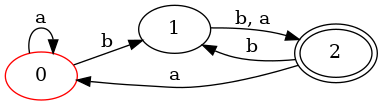

---


In [943]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
assert auto1.estComplet({'a', 'c', 'b'}) == False

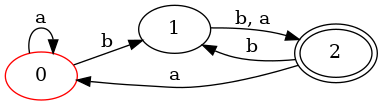

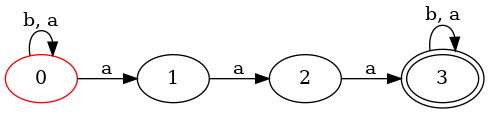

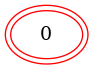

In [944]:
# Fournir un autre jeu de tests
### Test est_complet

auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt") # Correspond à l'automate "auto"
auto_t1.show()
assert auto_t1.estComplet({'a', 'b'}) == True

# Test sur un alphabet plus petit
assert auto_t1.estComplet({'a'}) == True

# Test sur un alphabet plus grand
assert auto_t1.estComplet({'a','b','c'}) == False

# Tests sur un automate non déterministe
auto_t2 = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
auto_t2.show(1.2)
assert auto_t2.estComplet({'a'}) == True
assert auto_t2.estComplet({'a','b'}) == False

# Test cas vides
auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt") # Correspond à l'automate "auto" 
assert auto_t1.estComplet(set()) == True

# Test un automate vide
auto_vide = Automate(set())
auto_vide.show()
assert auto_vide.estComplet('a') == True

# Test un seul etat qui est initial et finale
s6 = State(0,True,True)
auto_all = Automate(set(),{s6})
auto_all.show()
assert auto_all.estComplet('a') == False

4. Donner une définition de la fonction `estDeterministe`
qui, étant donné un automate `auto`,
 renvoie un booléen qui vaut vrai si et seulement si `auto` est déterministe.

In [945]:
# A faire 
def estDeterministe(self) :
    """ Automate -> bool
        rend True si auto est déterministe, False sinon
    """
    # Vérifier s'il y a exactement un état initial
    if len(self.getSetInitialStates()) != 1:
        # Si ce n'est pas le cas, l'automate n'est pas déterministe
        return False

    # Parcourir tous les états de l'automate
    for state in self.allStates:
        # Parcourir toutes les transitions sortantes de l'état actuel
        for etiq in self.getSetTransitionsFrom(state):
            # Vérifier si la transition produit plus d'un état de destination
            if len(self.succElem(state, etiq.etiquette)) > 1:
                # Si c'est le cas, l'automate n'est pas déterministe
                return False
    # Si toutes les conditions sont remplies, l'automate est déterministe
    return True

# Ajout de la méthode 'estDeterministe' à la classe 'Automate'
Automate.estDeterministe = estDeterministe

L'appel de fonction `copy.deepcopy(auto)` renvoie un nouvel automate identique à `auto`.

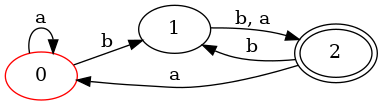

---


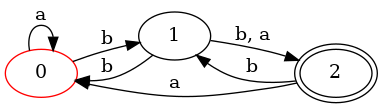

---


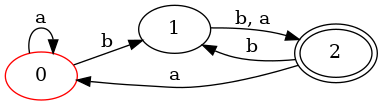

---


In [946]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estDeterministe() == True

auto1bis = copy.deepcopy(auto1)
#t : Transition
s0 = State(0,True,False)
s1 = State(1,False,False)
t = Transition(s1, 'b', s0)
auto1bis.addTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == False
auto1bis.removeTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == True

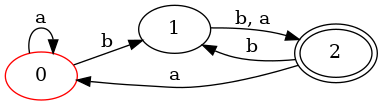

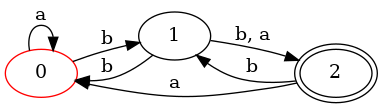

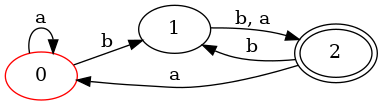

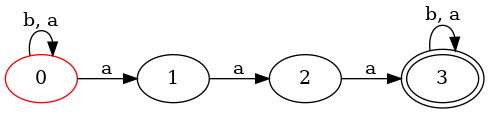

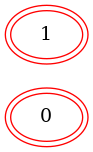

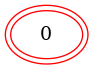

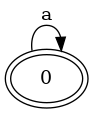

In [947]:
# Fournir un autre jeu de tests
### Test est_deterministe
auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")# Correspond à l'automate "auto"
auto_t1.show()
assert auto_t1.estDeterministe() == True
t = Transition(s1, 'b', s0)
auto_t1.addTransition(t)
auto_t1.show()
assert auto_t1.estDeterministe() == False

auto_t1.removeTransition(t)
auto_t1.show()
assert auto_t1.estDeterministe() == True

# Tests sur 2 automates non déterministes

auto_t2 = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
auto_t2.show()
assert auto_t2.estDeterministe() == False

# Test sur un automate avec 2 états initiaux
seul1 = State(0,True,True)
seul2 = State(1,True,True)

solitaire = Automate(set(),{seul1,seul2})
solitaire.show()
assert solitaire.estDeterministe() == False

# Test sur cas vide
auto_vide = Automate(set())
auto_vide.show()
assert auto_vide.estDeterministe() == False

# Test sur un automate qui a un seul etat qui est initiale et final
s3 = State(0,True,True)
auto_all = Automate(set(),{s3})
auto_all.show()
assert auto_all.estDeterministe() == True

s4 = State(0,False,True)
auto_all = Automate({Transition(s4,'a',s4)},{s4})
auto_all.show()
assert auto_all.estDeterministe() == False

5. Donner une définition de la fonction `completeAutomate`
qui, étant donné un automate `auto` et l'ensemble alphabet d'entrée `Alphabet`,
renvoie l'automate complété d'`auto`.
  
Attention, il ne faut pas modifier `auto`, mais construire un nouvel automate.
<br>Il pourra être intéressant d'utiliser l'appel de fonction
`copy.deepcopy(auto)` qui renvoie un nouvel automate identique à `auto`.
<br>On pourra faire appel à la fonction `nextId` afin de construire l'état $\bot$.

In [948]:
# A faire
def completeAutomate(self, Alphabet):
    """ Automate x str -> Automatechat
        rend l'automate complété de self, par rapport à Alphabet
    """
    # Effectue une copie profonde de l'automate d'origine
    auto_copie = copy.deepcopy(self)

    # Vérifie si l'automate est déjà complet
    if auto_copie.estComplet(Alphabet):
        return auto_copie

    # Crée un nouvel état non final ni initial
    state_ajoute = State(auto_copie.nextId(), False, False)
    # Ajoute cet état à la copie de l'automate
    auto_copie.addState(state_ajoute)

    # Parcourt tous les états de l'automate
    for state in auto_copie.allStates:
        # Parcourt tous les symboles de l'alphabet
        for etiq in Alphabet:
            # Si l'état actuel n'a pas de transition pour le symbole en cours
            if auto_copie.succElem(state, etiq) == set():
                # Crée une nouvelle transition vers l'état ajouté
                t_nouveau = Transition(state, etiq, state_ajoute)
                # Ajoute cette transition à la copie de l'automate
                auto_copie.addTransition(t_nouveau)

    # Retourne l'automate complété
    return auto_copie

# Ajoute la méthode completeAutomate à la classe Automate
Automate.completeAutomate = completeAutomate

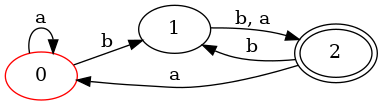

---


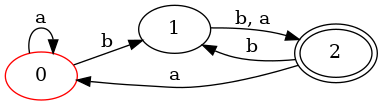

---


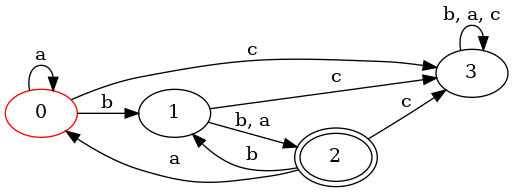

In [949]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
auto1complet = auto1.completeAutomate({'a', 'b'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b'}) == True

print('---')
assert auto1.estComplet({'a', 'b', 'c'}) == False
auto1complet = auto1.completeAutomate({'a', 'b', 'c'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b','c'}) == True

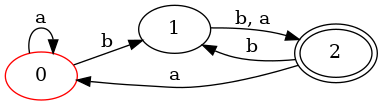

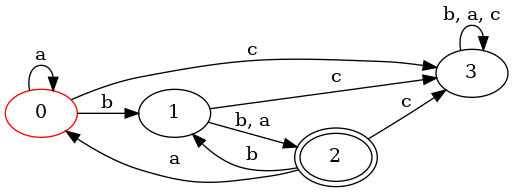

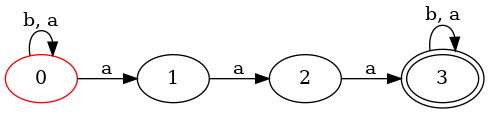

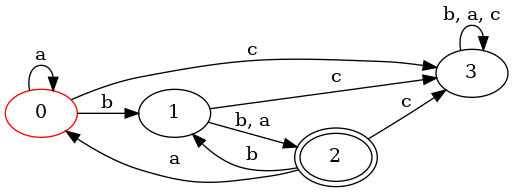

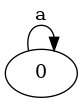

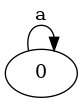

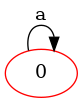

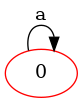

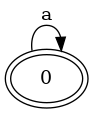

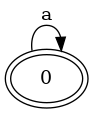

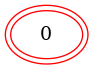

In [950]:
# Fournir un autre jeu de tests
### Test completeAutomate
auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")# Correspond à l'automate "auto"
auto_t1.show()
assert (auto_t1.estComplet({'a', 'b', 'c'}) == False)
auto_t1_c = auto_t1.completeAutomate({'a', 'b', 'c'})
auto_t1_c.show()
assert (auto_t1_c.estComplet({'a', 'b','c'}) == True)

# Test quand l'alphabet est vide
assert auto_t1.estComplet(set()) == True

# Test sur l'autpmate vide
auto_vide = Automate(set())
auto_vide.show()
assert auto_vide.estComplet({'a'}) == True

# Tests sur un automate non déterministe
auto_t2 = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
auto_t2.show()
assert (auto_t1.estComplet({'a', 'b', 'c'}) == False)
auto_t1_c = auto_t1.completeAutomate({'a', 'b', 'c'})
auto_t1_c.show()
assert (auto_t1_c.estComplet({'a', 'b','c'}) == True)

# Test sur un automate sans états final ni initial
s3 = State(0,False,False)
auto_if = Automate({Transition(s3,'a',s3)},{s3})
auto_if.show()
assert auto_if.estComplet({'a'}) == True
auto_if.completeAutomate({'a','b'})
auto_if.show()
assert auto_if.estComplet({'a','b'}) == False

#test sur un automate sans état final
s4 = State(0,True,False)
auto_f = Automate({Transition(s4,'a',s4)},{s4})
auto_f.show()
assert auto_f.estComplet({'a'}) == True
auto_f.completeAutomate({'a','b'})
auto_f.show()
assert auto_f.estComplet({'a','b'}) == False

#test sur un automate sans état initial
s5 = State(0,False,True)
auto_i = Automate({Transition(s5,'a',s5)},{s5})
auto_i.show()
assert auto_i.estComplet({'a'}) == True
auto_i.completeAutomate({'a','b'})
auto_i.show()
assert auto_i.estComplet({'a','b'}) == False

#test sur un etat initial et final
s6 = State(0,True,True)
auto_all = Automate(set(),{s6})
auto_all.show()
assert auto_all.estComplet(set()) == True

### 4. Déterminisation  <a class="anchor" id="sec4"></a>

1. Donner une définition de la fonction `newLabel`
qui, étant donné un ensemble d'états renvoie une *chaîne de caractères* représentant l'ensemble de tous les labels des états.
Par exemple, l'appel de `newLabel` sur un ensemble de 3 états dont les labels sont `'1', '2', '3'` renvoie `'{1,2,3}'`

Afin d'être assuré que l'ordre de parcours de l'ensemble des états n'a pas d'importance, il sera nécessaire de trier par ordre alphabétique la liste des `label` des états. On pourra faire appel à `L.sort()` qui étant donné la liste `L` de chaînes de caractères, la trie en ordre alphabétique.

In [951]:
# A faire

def newLabel(S):
    """ set[State] -> str
    """
    liste = []  # Crée une liste vide pour stocker les labels des états
    for s in S:  # Parcourt chaque état dans l'ensemble S
        liste.append(s.label)  # Ajoute le label de chaque état à la liste
    liste.sort()  # Trie la liste des labels par ordre croissant

    chaine = '{'  # Initialise une chaîne de caractères avec une accolade ouvrante
    for i in range(len(liste)-1):  # Parcourt la liste des labels jusqu'à l'avant-dernier élément
        chaine += (liste[i] + ',')  # Ajoute le label suivi d'une virgule à la chaîne
    chaine += liste[len(liste)-1] + '}'  # Ajoute le dernier label suivi d'une accolade fermante à la chaîne
    return chaine  # Retourne la chaîne de caractères représentant l'ensemble des labels des états


In [952]:
# On a défini auparavant un automate auto1, voilà un test le concernant :
assert newLabel(auto1.allStates) == '{0,1,2}'

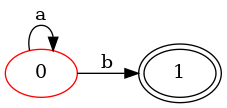

In [953]:
# Fournir un autre jeu de tests
s0 = State(0, True, False)
s1 = State(1, False, True)
deux_f = Automate({Transition(s0,'a',s0),Transition(s0,'b',s1)},{s0,s1})
deux_f.show()
assert newLabel(deux_f.allStates) == '{0,1}'

La fonction suivante permet de déterminiser un automate. On remarque qu'un état peut servir de clé dans un dictionnaire.

In [954]:
def determinisation(self) :
    """ Automate -> Automate
    rend l'automate déterminisé de self """
    # Ini : set[State]
    Ini = self.getSetInitialStates()
    # fin : bool
    fin = False
    # e : State
    for e in Ini:
        if e.fin:
            fin = True
    lab = newLabel(Ini)
    s = State(0, True, fin, lab)
    A = Automate(set())
    A.addState(s)
    Alphabet = {t.etiquette for t in self.allTransitions}
    Etats = dict()
    Etats[s] = Ini
    A.determinisation_etats(self, Alphabet, [s], 0, Etats, {lab})
    return A

Automate.determinisation = determinisation

L'automate déterminisé est construit dans `A`. Pour cela la fonction récursive `determinisation_etats` modifie en place l'automate `A`, et prend en outre les paramètres suivants :
- `auto`, qui est l'automate de départ à déterminiser
- `Alphabet` qui contient l'ensemble des lettres étiquetant les transistions de l'automate de départ
- `ListeEtatsATraiter` qui est la liste des états à ajouter et à traiter dans `A` au fur et à mesure que l'on progresse dans `auto`.
- `i` qui est l'indice de l'état en cours de traitement (dans la liste `ListeEtatsATraiter`).
- `Etats` qui est un dictionnaire dont les clés sont les états de `A` et les valeurs associées sont l'ensemble d'états issus de `auto` que cette clé représente.
- `DejaVus` est l'ensemble des labels d'états de `A` déjà vus.

In [955]:
# A faire 

def determinisation_etats(self, auto, Alphabet, ListeEtatsATraiter, i, Etats, DejaVus):
    """ Automate x Automate x set[str] x list[State] x int x dict[State : set[State]], set[str] -> NoneType
    """
    # Pour chaque symbole de l'alphabet,
    for a in Alphabet:
        # Calcule l'ensemble temporaire résultant de la transition avec le symbole courant.
        ens_tmp = auto.succ(Etats[ListeEtatsATraiter[i]], a)
        # Crée un label pour cet ensemble.
        label_tmp = newLabel(ens_tmp)
        
        # Vérifie si le label n'a pas déjà été traité.
        if (label_tmp not in DejaVus):
            # Ajoute le label aux ensembles déjà vus.
            DejaVus.add(label_tmp)
            flag = False
            
            # Vérifie si l'ensemble temporaire contient un état final.
            for f in auto.getSetFinalStates():
                if f in ens_tmp:
                    flag = True
            
            # Crée un nouvel état en fonction de la présence d'un état final.
            if flag:
                state_tmp = State(i+1, False, True, label_tmp)
            else:
                state_tmp = State(i+1, False, False, label_tmp)
            
            # Ajoute le nouvel état à l'automate.
            self.addState(state_tmp)
            Etats[state_tmp] = ens_tmp
            ListeEtatsATraiter.append(state_tmp)
            
            # Crée une transition de l'état actuel vers le nouvel état.
            t_tmp = Transition(ListeEtatsATraiter[i], a, state_tmp)
            self.addTransition(t_tmp)

            # Appelle récursivement la fonction pour traiter les états suivants.
            self.determinisation_etats(auto, Alphabet, ListeEtatsATraiter, i+1, Etats, DejaVus)
        else:
            # Si le label a déjà été traité, trouve l'état correspondant dans l'automate résultant.
            for s in self.allStates:
                if Etats[s] == ens_tmp:
                    # Ajoute une transition de l'état actuel vers l'état existant correspondant.
                    t_tmp = Transition(ListeEtatsATraiter[i], a, s)
            self.addTransition(t_tmp)
    
    # Termine la fonction.
    return

# Ajoute la fonction determinisation_etats à la classe Automate.
Automate.determinisation_etats = determinisation_etats

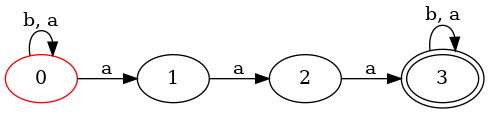

True


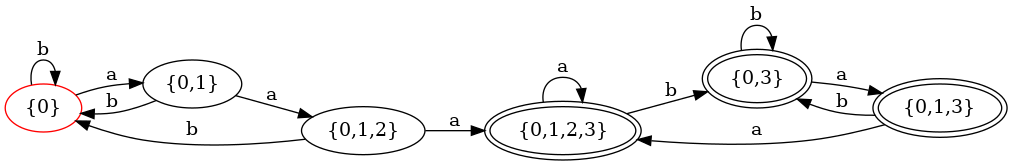

In [956]:
# Voici un test
#automate est l'automate construit plus haut a partir du fichier exempleAutomate.txt
automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
automate.show() #l'ensemble des états successeurs de tous les états de par le caractè
auto_det = automate.determinisation()
print(auto_det.estDeterministe())
auto_det.show(2)

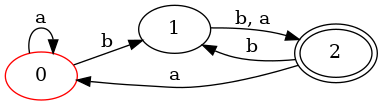

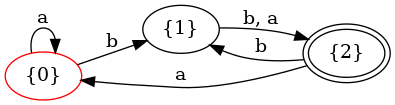

In [957]:
#Fournir d'autres jeux de tests
auto_t2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")
auto_t2.show()
assert (auto_t2.estDeterministe() == True)
auto_det = auto_t2.determinisation()
assert (auto_det.estDeterministe()== True)
auto_det.show()

### 5. Constructions sur les automates réalisant  des opérations sur les langages acceptés <a class="anchor" id="sec5"></a>


#### 5.1 Opérations ensemblistes sur les langages <a class="anchor" id="sec5_1"></a>

1. Donner une définition de la fonction `complementaire` qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`, renvoie l'automate acceptant la langage complémentaire du langage accepté par `auto`. Ne pas modifier l'automate `auto`, mais construire un nouvel automate.

In [958]:
#A faire

def complementaire(self, Alphabet):
    """ Automate -> Automate
        rend l'automate acceptant pour langage le complémentaire du langage de self
    """
    # Vérifie si l'automate est déterministe et complet.
    if self.estDeterministe() and self.estComplet(Alphabet):
        # Si c'est le cas, crée une copie profonde de l'automate.
        tmp = copy.deepcopy(self)
    else:
        # Sinon, si l'automate n'est pas déterministe, le déterminise.
        if not(self.estDeterministe()):
            tmp = self.determinisation()
        # Si l'automate n'est pas complet, le complète.
        if not(self.estComplet(Alphabet)):
            tmp = self.completeAutomate(Alphabet)
    
    # Inverse l'étiquette d'acceptation (fin) pour chaque état dans l'automate.
    for s in tmp.allStates:
        s.fin = not(s.fin)
    
    # Renvoie l'automate modifié.
    return tmp

# Ajoute la fonction complementaire à la classe Automate.
Automate.complementaire = complementaire

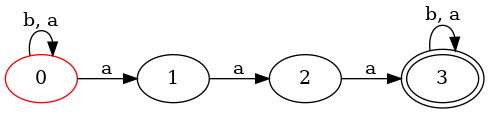

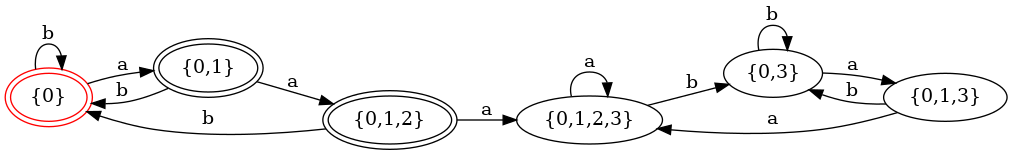

In [959]:
# Voici un test

automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
automate.show()
Alphabet = {t.etiquette for t in auto.allTransitions}
auto_compl = automate.complementaire(Alphabet)
auto_compl.show(2)

Automate déterministe et complet:


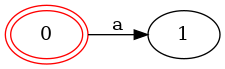


Automate complémentaire:


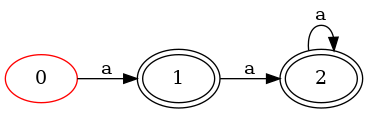


Automate non déterministe:


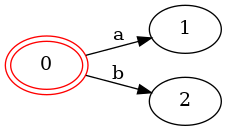


Automate complémentaire du non déterministe:


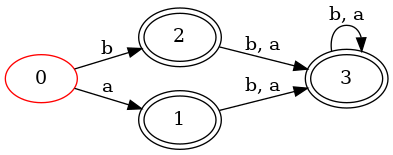


Automate non complet:


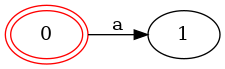


Automate complémentaire du non complet:


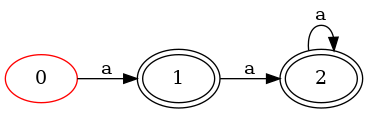

In [960]:
# Test 1 : Automate déjà déterministe et complet
auto_deterministe_complet = Automate({Transition(State(0, True, True), 'a', State(1, False, False))})
print("Automate déterministe et complet:")
auto_deterministe_complet.show()
auto_complement = auto_deterministe_complet.complementaire({'a'})
print("\nAutomate complémentaire:")
auto_complement.show()

# Test 2 : Automate non déterministe, déterminisation nécessaire
auto_non_deterministe = Automate({Transition(State(0, True, True), 'a', State(1, False, False)),
                                  Transition(State(0, True, True), 'b', State(2, False, False))})
print("\nAutomate non déterministe:")
auto_non_deterministe.show()
auto_complement_non_deterministe = auto_non_deterministe.complementaire({'a', 'b'})
print("\nAutomate complémentaire du non déterministe:")
auto_complement_non_deterministe.show()

# Test 3 : Automate non complet, complétion nécessaire
auto_non_complet = Automate({Transition(State(0, True, True), 'a', State(1, False, False))})
print("\nAutomate non complet:")
auto_non_complet.show()
auto_complement_non_complet = auto_non_complet.complementaire({'a'})
print("\nAutomate complémentaire du non complet:")
auto_complement_non_complet.show()


2. Donner une définition de la fonction `intersection` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant l'intersection des langages acceptés par `auto1` et `auto2`.

L'automate construit ne doit pas avoir d'état non accessible depuis l'état initial.

In [961]:
#A faire


def intersection(self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage l'intersection des langages des deux automates
    """
    # Obtient les états initiaux des deux automates.
    init_1 = self.getSetInitialStates()
    init_2 = auto.getSetInitialStates()
    
    # Crée un nouvel automate pour l'intersection.
    A = Automate(set())
    
    # Initialisation des structures de données.
    tab_ref = []
    ListeEtatsATraiter = []
    DejaVu = []
    i = 0
    Etats = dict()

    # Crée les états initiaux de l'automate résultant.
    for e1 in init_1:
        for e2 in init_2:
            s = State(0, True, False, (e1.label + " X " + e2.label))
            A.addState(s)
            ListeEtatsATraiter.append(s)
            Etats[(e1, e2)] = s
            tab_ref.append([e1, e2])
            DejaVu.append(e1.label + e2.label)
    num = 1
    alphabet = {t.etiquette for t in self.allTransitions}
    
    # Appelle la fonction récursive pour construire l'automate résultant.
    A.intersection_etats(self, auto, tab_ref, ListeEtatsATraiter, i, alphabet, Etats, DejaVu, num)
    return A
    
Automate.intersection = intersection


def intersection_etats(self, auto1, auto2, tab_ref, ListeEtatsATraiter, i, alphabet, Etats, DejaVu, num):
    """ Automate x Automate x list x list x int x set -> int
    Construit les états de l'intersection de deux automates de manière récursive.
    
    Args:
        auto1 (Automate): Premier automate.
        auto2 (Automate): Deuxième automate.
        tab_ref (list): Liste de références vers les états des deux automates.
        ListeEtatsATraiter (list): Liste des états à traiter.
        i (int): Indice de l'état actuellement traité.
        alphabet (set): Alphabet commun aux deux automates.
        Etats (dict): Dictionnaire pour associer les paires d'états aux états de l'intersection.
        DejaVu (list): Liste des états déjà traités.
        num (int): Numéro de l'état actuel.
    
    Returns:
        int: Le numéro de l'état suivant.
    """
    # Vérifie si l'indice i est dans la plage valide de tab_ref.
    if i >= len(tab_ref):
        return num
    
    # Parcourt l'alphabet pour les transitions.
    for t in alphabet:
        ste_1 = auto1.succElem(tab_ref[i][0], t)
        ste_2 = auto2.succElem(tab_ref[i][1], t)
        
        # Vérifie si les successeurs sont vides, si oui, passe à la transition suivante.
        if ste_1 == set() and ste_2 == set():
            break
        
        # Pour chaque paire d'états successeurs, crée un état dans l'automate résultant.
        for s1 in ste_1:
            for s2 in ste_2:
                if (s1.label + s2.label) not in DejaVu:
                    if not (s1.fin and s2.fin):
                        s = State(num, False, False, (s1.label + " X " + s2.label))
                    else:
                        s = State(num, False, True, (s1.label + " X " + s2.label))
                    num += 1
                    self.addState(s)
                    tab_ref.append([s1, s2])
                    ListeEtatsATraiter.append(s)
                    t_tmp = Transition(ListeEtatsATraiter[i], t, s)
                    Etats[(s1, s2)] = s
                    DejaVu.append(s1.label + s2.label)
                    self.addTransition(t_tmp)
                    num = self.intersection_etats(auto1, auto2, tab_ref, ListeEtatsATraiter, num - 1, alphabet, Etats, DejaVu, num)
                else:
                    trans = self.getSetTransitionsFrom(ListeEtatsATraiter[i])
                    # Si l'état actuel a déjà des transitions, vérifie si la transition existe déjà.
                    if trans == set():
                        t_tmp = Transition(ListeEtatsATraiter[i], t, Etats[(s1, s2)])
                        self.addTransition(t_tmp)
                    else:
                        flag = True
                        for trans_tmp in trans:
                            if trans_tmp.etiquette == t and trans_tmp.stateDest == Etats[(s1, s2)]:
                                flag = False
                                break
                        if flag:
                            t_tmp = Transition(ListeEtatsATraiter[i], t, Etats[(s1, s2)])
                            self.addTransition(t_tmp)
    return num

    
Automate.intersection_etats = intersection_etats

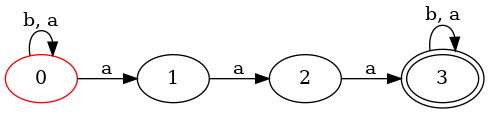

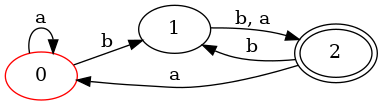

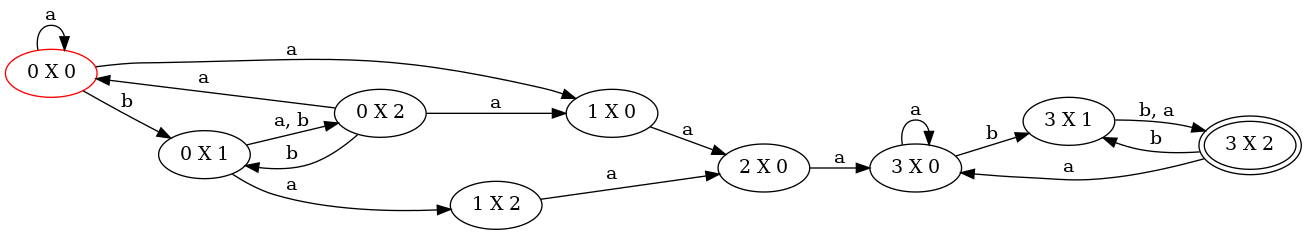

In [962]:
#Un premier test

automate.show()
auto2.show()
inter = automate.intersection(auto2)
inter.show(2)

Automate 1:


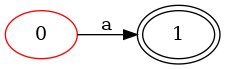


Automate 2:


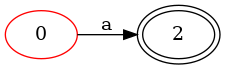


Intersection des Automates 1 et 2:


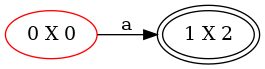


Automate 3:


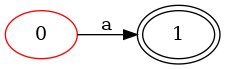


Automate 4:


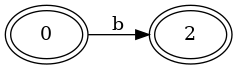


Intersection des Automates 3 et 4:



Automate 5:


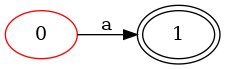


Automate 6:


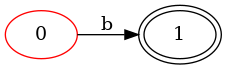


Intersection des Automates 5 et 6:


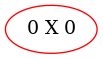

In [963]:
# Fournir d'autres tests
# Test 1 : Automates simples avec intersection non vide
auto1 = Automate({Transition(State(0, True, False), 'a', State(1, False, True))})
auto2 = Automate({Transition(State(0, True, False), 'a', State(2, False, True))})

print("Automate 1:")
auto1.show()
print("\nAutomate 2:")
auto2.show()

auto_intersection_1 = auto1.intersection(auto2)
print("\nIntersection des Automates 1 et 2:")
auto_intersection_1.show()

# Test 2 : Automates avec intersection vide
auto3 = Automate({Transition(State(0, True, False), 'a', State(1, False, True))})
auto4 = Automate({Transition(State(0, False, True), 'b', State(2, False, True))})

print("\nAutomate 3:")
auto3.show()
print("\nAutomate 4:")
auto4.show()

auto_intersection_2 = auto3.intersection(auto4)
print("\nIntersection des Automates 3 et 4:")
auto_intersection_2.show()

# Test 3 : Automates complexes
s0 = State(0, True, False)
s1 = State(1, False, True)
t1 = Transition(s0, 'a', s1)
auto5 = Automate({t1})

s2 = State(0, True, False)
s3 = State(1, False, True)
t2 = Transition(s2, 'b', s3)
auto6 = Automate({t2})

print("\nAutomate 5:")
auto5.show()
print("\nAutomate 6:")
auto6.show()

auto_intersection_3 = auto5.intersection(auto6)
print("\nIntersection des Automates 5 et 6:")
auto_intersection_3.show()


3. (Question facultative) Donner une définition de la fonction `union` qui, étant donné deux automates `auto1` `auto2`, renvoie l'automate acceptant comme langage l'union des langages acceptés par `auto1` et `auto2`.

In [964]:
def union(self, auto):
    """ Automate x Automate -> Automate
    Rend l'automate acceptant pour langage l'union des langages des deux automates.
    """
    # Obtient les états initiaux des deux automates.
    init_1 = self.getSetInitialStates()
    init_2 = auto.getSetInitialStates()

    # Crée un nouvel automate pour l'union.
    A = Automate(set())

    # Initialisation des structures de données.
    tab_ref = []
    ListeEtatsATraiter = []
    DejaVu = []
    i = 0
    Etats = dict()

    # Crée les états initiaux de l'automate résultant.
    for e1 in init_1:
        for e2 in init_2:
            s = State(0, True, False, (e1.label + " U " + e2.label))  # Utilisez "U" pour l'union dans le label.
            A.addState(s)
            ListeEtatsATraiter.append(s)
            Etats[(e1, e2)] = s
            tab_ref.append([e1, e2])
            DejaVu.append(e1.label + e2.label)
    num = 1
    alphabet = {t.etiquette for t in self.allTransitions} | {t.etiquette for t in auto.allTransitions}  # Union des alphabets.

    # Appelle la fonction récursive pour construire l'automate résultant.
    A.union_etats(self, auto, tab_ref, ListeEtatsATraiter, i, alphabet, Etats, DejaVu, num)
    return A

Automate.union = union

def union_etats(self, auto1, auto2, tab_ref, ListeEtatsATraiter, i, alphabet, Etats, DejaVu, num):
    # Vérifie si l'indice i est dans la plage valide de tab_ref.
    if i >= len(tab_ref):
        return num

    # Parcourt l'alphabet pour les transitions.
    for t in alphabet:
        ste_1 = auto1.succElem(tab_ref[i][0], t)
        ste_2 = auto2.succElem(tab_ref[i][1], t)

        # Vérifie si les successeurs sont vides, si oui, passe à la transition suivante.
        if ste_1 == set() and ste_2 == set():
            break

        # Pour chaque paire d'états successeurs, crée un état dans l'automate résultant.
        for s1 in ste_1:
            for s2 in ste_2:
                if (s1.label + s2.label) not in DejaVu:
                    if not (s1.fin or s2.fin):
                        s = State(num, False, False, (s1.label + " U " + s2.label))
                    else:
                        s = State(num, False, True, (s1.label + " U " + s2.label))
                    num += 1
                    self.addState(s)
                    tab_ref.append([s1, s2])
                    ListeEtatsATraiter.append(s)
                    t_tmp = Transition(ListeEtatsATraiter[i], t, s)
                    Etats[(s1, s2)] = s
                    DejaVu.append(s1.label + s2.label)
                    self.addTransition(t_tmp)
                    num = self.union_etats(auto1, auto2, tab_ref, ListeEtatsATraiter, num - 1, alphabet, Etats, DejaVu, num)
                else:
                    trans = self.getSetTransitionsFrom(ListeEtatsATraiter[i])
                    # Si l'état actuel a déjà des transitions, vérifie si la transition existe déjà.
                    if trans == set():
                        t_tmp = Transition(ListeEtatsATraiter[i], t, Etats[(s1, s2)])
                        self.addTransition(t_tmp)
                    else:
                        flag = True
                        for trans_tmp in trans:
                            if trans_tmp.etiquette == t and trans_tmp.stateDest == Etats[(s1, s2)]:
                                flag = False
                                break
                        if flag:
                            t_tmp = Transition(ListeEtatsATraiter[i], t, Etats[(s1, s2)])
                            self.addTransition(t_tmp)
    return num

Automate.union_etats = union_etats


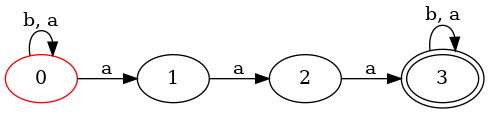

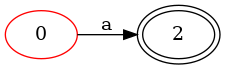

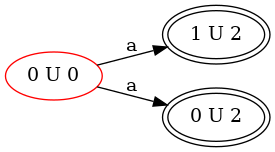

In [965]:
#Un premier test

automate.show()
auto2.show()
uni = automate.union(auto2)
uni.show(2)

#### 5.2 Opérations rationnelles sur les langages <a class="anchor" id="sec5_2"></a>

Programmer *une des deux* méthodes suivantes:

1. Donner une définition de la fonction `concatenation` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant comme langage la concaténation des langages acceptés par `auto1` et `auto2`.

2. Donner une définition de la fonction `etoile` qui, étant donné un automate `auto`, renvoie l'automate acceptant comme langage l'étoile du langages accepté par `auto`.

In [966]:
# A faire
def concatenation(self, auto):
    """ Automate x Automate -> Automate
    Rend l'automate acceptant pour langage la concaténation des langages des deux automates.
    """
    # Crée un nouvel automate pour la concaténation.
    A = Automate(set())

    # Obtient les transitions des deux automates.
    trs_1 = self.allTransitions
    trs_2 = auto.allTransitions

    # Identifiant pour éviter les conflits d'identifiants d'états.
    id = self.nextId()

    # Traite les transitions du premier automate.
    for t1 in trs_1:
        # Ajoute l'état source de la transition s'il n'est pas déjà présent dans A.
        if t1.stateSrc not in A.allStates:
            if t1.stateSrc in self.getSetFinalStates():
                s_tmp = State(t1.stateSrc.id, False, False)
            else:
                s_tmp = t1.stateSrc
            A.addState(s_tmp)
        
        # Ajoute l'état destination de la transition s'il n'est pas déjà présent dans A.
        if t1.stateDest not in A.allStates:
            if t1.stateDest in self.getSetFinalStates():
                s_tmp = State(t1.stateDest.id, False, False)
                A.addState(s_tmp)
            else:
                A.addState(t1.stateDest)       

        # Si l'état destination de la transition est final dans le premier automate,
        # crée une transition vers un nouvel état final dans A.
        if t1.stateDest in self.getSetFinalStates():
            for s in A.allStates:
                if s.id == t1.stateDest.id:
                    t_tmp = Transition(t1.stateSrc, t1.etiquette, s)
                    break
        else:
            t_tmp = Transition(t1.stateSrc, t1.etiquette, t1.stateDest)
        A.addTransition(t_tmp)

    # Traite les transitions du deuxième automate.
    for t2 in trs_2:
        # Vérifie et ajoute l'état source du deuxième automate dans A avec un identifiant modifié.
        flag = True
        for stg in A.allStates:
            if stg.id == t2.stateSrc.id + id:
                flag = False
                break
        if flag:
            s = State(t2.stateSrc.id + id, False, t2.stateSrc.fin)
            A.addState(s)
        
        # Vérifie et ajoute l'état destination du deuxième automate dans A avec un identifiant modifié.
        flag = True
        for std in A.allStates:
            if std.id == t2.stateDest.id + id:
                flag = False
                break
        if flag:
            s = State(t2.stateDest.id + id, False, t2.stateDest.fin)
            A.addState(s)

        # Obtient les états source et destination modifiés pour la transition.
        stg = t2.stateSrc
        std = t2.stateDest
        for s in A.allStates:
            if s.id == t2.stateSrc.id + id and s.id != 0:
                stg = s
            if s.id == t2.stateDest.id + id and s.id != 0:
                std = s
        t_tmp = Transition(stg, t2.etiquette, std)
        A.addTransition(t_tmp)

    # Ajoute les transitions vers le nouvel état final dans A pour les états finaux du premier automate.
    for t in trs_1:
        if t.stateDest.fin:
            s = t.stateDest
            for s_tmp in A.allStates:
                if s_tmp.id == id:
                    s = s_tmp
                    break
            t_add = Transition(t.stateSrc, t.etiquette, s)
            A.addTransition(t_add)

    return A

Automate.concatenation = concatenation

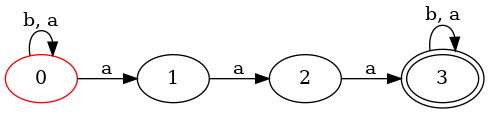

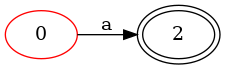

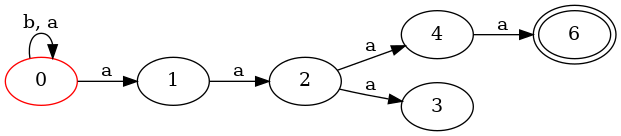

In [967]:
#Un premier test

automate.show()
auto2.show()
concat = automate.concatenation(auto2)
concat.show(2)

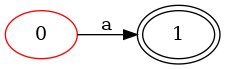

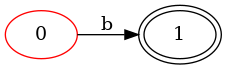

Concaténation des Automates 1 et 2:


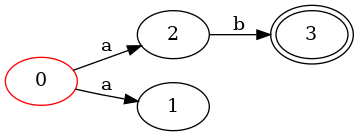

In [968]:
#Fournir un autre jeu de test
# Crée un automate 1
auto1 = Automate(set())
s0_1 = State(0, True, False)
s1_1 = State(1, False, True)
t1_1 = Transition(s0_1, 'a', s1_1)
auto1.addState(s0_1)
auto1.addState(s1_1)
auto1.addTransition(t1_1)
auto1.show()

# Crée un automate 2
auto2 = Automate(set())
s0_2 = State(0, True, False)
s1_2 = State(1, False, True)
t1_2 = Transition(s0_2, 'b', s1_2)
auto2.addState(s0_2)
auto2.addState(s1_2)
auto2.addTransition(t1_2)
auto2.show()

# Concaténation des automates
auto_concat = auto1.concatenation(auto2)

# Affiche l'automate résultant
print("Concaténation des Automates 1 et 2:")
auto_concat.show()

In [969]:
def etoile(self):
    """Automate -> Automate
    Rend l'automate acceptant pour langage l'étoile du langage de A
    """
    # Création d'un nouvel automate pour le langage étoile
    automate_etoile = copy.deepcopy(self)
        
    # Si l'automate accepte déjà le mot vide
    if automate_etoile.accepte(""):
        return automate_etoile

    # Ajout d'un nouvel état initial et final
    new_initial_state = State(self.nextId(), True, True)
    automate_etoile.addState(new_initial_state)

    # Ajout des transitions pour la clôture étoile
    for etat_final in self.getSetFinalStates():
        automate_etoile.addTransition(Transition(new_initial_state, "", etat_final))

    return automate_etoile

Automate.etoile = etoile

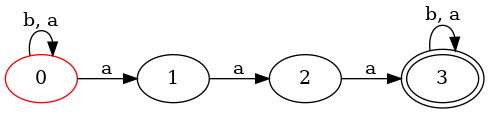

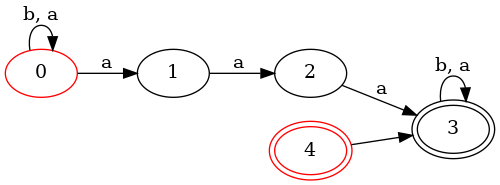

In [970]:
#Un premier test

automate.show()
autoetoile = automate.etoile()
autoetoile.show()

In [ ]:
#Fournir un autre jeu de tests
#Fournir un autre jeu de tests

# Création d'automates de test
automate1 = Automate(set())
automate1.addState(State(1, True, False))
automate1.addState(State(2, False, True))
automate1.addTransition(Transition(State(1, True, False), 'a', State(2, False, True)))

automate2 = Automate(set())
automate2.addState(State(1, True, True))
automate2.addState(State(2, False, True))
automate2.addTransition(Transition(State(1, True, True), 'a', State(2, False, True)))

# Test de la fonction etoile sur les automates de test
automate1_etoile = automate1.etoile()
automate2_etoile = automate2.etoile()

#affichage
automate1.show()
automate1_etoile.show()
automate2.show()
automate2_etoile.show()

#Vérifiactions pour Automate 1
assert automate1.accepte("") == False
assert automate1.accepte("a") == True
assert automate1.accepte("aa") == False
assert automate1.accepte("aaa") == False

# Vérifications pour Automate 1 étoilé
assert automate1_etoile.accepte("") == True
assert automate1_etoile.accepte("a") == True
assert automate1_etoile.accepte("aa") == False
assert automate1_etoile.accepte("aaa") == False

#Vérifiactions pour Automate 2
assert automate2.accepte("") == True
assert automate2.accepte("a") == True
assert automate2.accepte("aa") == False
assert automate2.accepte("aaa") == False

# Vérifications pour Automate 2 étoilé
assert automate2_etoile.accepte("") == True
assert automate2_etoile.accepte("a") == True
assert automate2_etoile.accepte("aa") == False
assert automate2_etoile.accepte("aaa") == False

In [ ]:
# Remarque
# Dans le ficher auto2.txt : 
#E: 0 1 2 
#I: 0
#F: 2
#T: (0 a 0)
(0 b 1)
(1 a 2)
(1 b 2)
(2 a 0)
(2 b 1)
